In [3]:
!pip install reportlab

     ---------------------------------------- 1.9/1.9 MB 5.4 MB/s eta 0:00:00
     -------------------------------------- 199.4/199.4 kB 4.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\kevin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
!pip install pillow

     ---------------------------------------- 2.6/2.6 MB 6.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\kevin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [112]:
import random
from PIL import Image, ImageDraw, ImageFont
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

# Block types and quantities
blocks = {
    'sphere':{
        'red':8,
        'orange':5,
        'yellow':3,
        'green':9,
        'blue':5,
        'purple':5
    },
    'cube': {
        'red':6,
        'orange':3,
        'yellow':4,
        'green':4,
        'blue':6,
        'purple':2
    },
    'cylinder': {
        'red':2,
        'orange':5,
        'yellow':3,
        'green':6,
        'blue':5,
        'purple':4
    }
}

block_colors = {
        'red': (214, 66, 66),  # Red
        'orange': (245, 129, 66),  # Orange
        'yellow': (250, 213, 65),  # Yellow
        'blue': (2, 161, 219),  # Blue
        'green': (2, 219, 136),  # Green
        'purple': (62, 25, 125)
    }

bucket = [z for y in [[(shape,color)]*cnt for shape in blocks.keys() for color,cnt in blocks[shape].items()] for z in y]
bucket[0:10]


[('sphere', 'red'),
 ('sphere', 'red'),
 ('sphere', 'red'),
 ('sphere', 'red'),
 ('sphere', 'red'),
 ('sphere', 'red'),
 ('sphere', 'red'),
 ('sphere', 'red'),
 ('sphere', 'orange'),
 ('sphere', 'orange')]

In [113]:
# Define function to generate random block groups
def generate_groups(block_list):
    random.shuffle(block_list)  # Shuffle the list to randomize the blocks
    holder = block_list.copy()
    
    groups = []
    while len(groups) < 3:  # Ensure that each group has exactly 5 blocks
        group = [holder.pop() for _ in range(5)]  # Pop 5 blocks for each group
        groups.append(group)
    
    return groups

generate_groups(bucket)

[[('sphere', 'red'),
  ('sphere', 'orange'),
  ('cube', 'red'),
  ('cylinder', 'orange'),
  ('cylinder', 'red')],
 [('cylinder', 'purple'),
  ('cube', 'blue'),
  ('sphere', 'green'),
  ('cube', 'blue'),
  ('sphere', 'red')],
 [('cylinder', 'purple'),
  ('cube', 'blue'),
  ('cylinder', 'blue'),
  ('sphere', 'red'),
  ('cylinder', 'yellow')]]

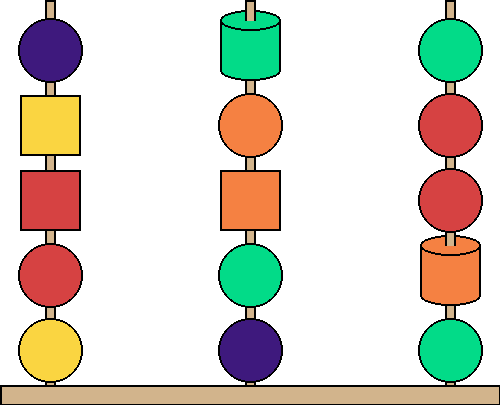

In [183]:
def draw_cylinder(draw, i, height, color):
    # left, top, right, bottom
    # Draw bottom ellipse
    draw.ellipse((20, 80 - 20 + i * height, 80, 80 + i * height), fill=color, outline="black",width=2)
    # Draw rectangle
    draw.rectangle([20, 20 + i * height, 80, 80 - 10 + i * height], fill=color) # left x, top left y, right x, bottom right y
    # Draw top ellip,se
    draw.ellipse((20, 20 - 10 + i * height, 80, 20 + 10 + i * height), fill=color, outline="black",width=2)
    # draw sides outlines
    draw.line((20, 20 + i * height, 20, 80 - 10 + i * height),fill="black",width=2)
    draw.line((80 - 1, 20 + i * height, 80 - 1, 80 - 10 + i * height),fill="black",width=2)

    # draw rod
    draw.rectangle([50 - 5, 20 - 10 + i * height, 50 + 5, 20 + i * height],fill="tan")
    draw.line((50 - 5, 20 - 10 + i * height, 50 - 5, 20 + i * height),fill="black",width=2)
    draw.line((50 + 5-1, 20 - 10 + i * height, 50 + 5-1, 20 + i * height),fill="black",width=2)
    
def render_rods(rods):
    width = 100
    height = 75
    platform_width = width * (len(rods) + len(rods) - 1)
    platform_height = height * len(rods[0]) + 30
    img = Image.new('RGB', (platform_width, platform_height), (255, 255, 255))
    for j, group in enumerate(rods):
        rod_image = Image.new('RGB', (width, height * len(rods[0]) + 20), (255, 255, 255))
        draw = ImageDraw.Draw(rod_image)
        render_group(rod_image, draw, group, height)

        img.paste(rod_image,(j*width*2,0))

    # add bottom platform
    draw = ImageDraw.Draw(img)
    # left, top, right, bottom
    draw.rectangle((0, platform_height - 20, platform_width, platform_height),fill='tan',outline="black",width=2)


    return img, platform_width, platform_height
        

def render_group(img, draw, group, height):
    # render rod
    draw.rectangle([50 - 5, 0, 50 + 5, img.height],fill="tan",outline="black",width=2)
    for i, block in enumerate(group):
        color = block_colors[block[1]]
        # Render as simple rectangles or circles for shapes
        if block[0] == 'cylinder':
            draw_cylinder(draw, i, height, color)
        elif block[0] == 'cube':
            draw.rectangle([20, 
                            20 + i * height, 
                            80, 
                            80 + i * height], fill=color,outline="black",width=2)
        elif block[0] == 'sphere':
            # Draw a circle using an ellipse with a square bounding box
            left = 20 - 2
            top = 20 -2 + i * height
            right = 80 + 2
            bottom = 80 + 2 + i * height
            draw.ellipse([left, top, right, bottom], fill=color,outline="black",width=2)


t_groups = generate_groups(bucket)
t_img, _, _ = render_rods(t_groups)
t_img

In [205]:

# Create PDF
def create_pdf(platform_img1, platform_img2, w, h):
    c = canvas.Canvas("game_templates.pdf", pagesize=letter)
    img_path = "group_image.png"
    platform_img1.save(img_path)
        
    c.drawImage(img_path, 90, 55, width=w, height=h)
    c.drawImage(img_path, 90, h+100, width=w, height=h)
    c.showPage()

        
    c.save()

# Generate and render the groups
t_groups = generate_groups(bucket)
t_img, w, h = render_rods(t_groups)
create_pdf(t_img,t_img, w-60, h-80)

In [210]:
pages = 50

c = canvas.Canvas("game_cards.pdf", pagesize=letter)
    
for p in range(pages):
    platforms = []
    for s in range(2):
        groups = generate_groups(bucket)
        platform, w, h = render_rods(groups)

        # save the image
        img_path = "group_image"+str(p)+"_"+str(s)+".png"
        platform.save(img_path)
        platforms.append(img_path)
        
    c.drawImage(platforms[0], 90, 55, width=w-60, height=h-80)
    c.drawImage(platforms[1], 90, h-80+100, width=w-60, height=h-80)
    c.showPage()
    
c.save()